Importing the necessary libraries from the custom functions.py file

In [30]:
from functions import *

Initializing the dataset

In [31]:
df = pd.read_csv("Heart Disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [32]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
HeartDisease         0
dtype: int64

In [33]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
HeartDisease       0
dtype: int64

In [34]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [35]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [36]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [37]:
y.value_counts()

0    3594
1     644
Name: HeartDisease, dtype: int64

In [38]:
X_train, x, y_train, y_temp = train_test_split(X,y,test_size = 0.3, random_state= 42)
X_test, X_val, y_test, y_val = train_test_split(x, y_temp, test_size = 0.5, random_state = 42)

Standardizing the data as there is huge variation between the ranges of each feature (scratch implementation)

In [39]:
X_train_scaled, X_test_scaled, X_val_scaled = standardize(X_train,X_test,X_val) 
X_train_scaled.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2010,-0.852752,-0.888585,-0.959109,0.983780,-0.017458,-0.175494,-0.082381,1.475892,-0.162138,0.819665,0.113168,0.585221,-0.887353,-0.505143,-0.002243
3340,-0.852752,1.694360,-0.959109,-1.016145,-0.775144,5.784590,-0.082381,1.475892,-0.162138,1.064525,1.247060,0.332114,0.999829,-0.925578,0.220281
3591,-0.852752,-1.240805,0.038606,-1.016145,-0.775144,-0.175494,-0.082381,-0.677328,-0.162138,-0.716275,-1.292859,-0.764683,-1.285166,-0.673317,-0.002243
2742,1.172278,-1.123398,-0.959109,0.983780,0.908603,-0.175494,-0.082381,-0.677328,-0.162138,-0.204295,-0.068255,-0.258469,0.223610,-1.009665,-0.354461
4034,-0.852752,-1.123398,0.038606,0.983780,0.908603,-0.175494,-0.082381,-0.677328,-0.162138,-0.538195,-0.113611,-0.258469,-1.423430,1.681121,-0.266039


# Part a 
## Logistic Regression from Scratch 

In [40]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, epochs=100, batch_size=None, pred_type=None, early_stopping=False, patience=5, l1=0, l2=0):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.pred_type = pred_type
        self.early_stopping = early_stopping
        self.patience = patience
        self.l1 = l1 
        self.l2 = l2  
        self.train_loss_list = []
        self.val_loss_list = []
        self.train_acc = []
        self.val_acc = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def CrossEntropyLoss(self, y_true, y_pred):
        m = len(y_true)
        epsilon = 1e-10  # Small value to prevent log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Regularization terms
        l1_penalty = self.l1 * np.sum(np.abs(self.weights)) if self.l1 > 0 else 0
        l2_penalty = self.l2 * np.sum(self.weights**2) if self.l2 > 0 else 0
        
        loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
        return loss + l1_penalty + l2_penalty
    
    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.random.randn(n) * 0.01
        self.bias = 0
        
        best_val_loss = float('inf')
        patience_counter = 0
        
        for i in range(self.epochs):
            if self.batch_size is None:
                # Full batch gradient descent
                batch_X, batch_y = X, y
            elif self.batch_size == 1:
                # Stochastic gradient descent
                idx = np.random.randint(m)
                batch_X = X.iloc[[idx]] if isinstance(X, pd.DataFrame) else X[idx:idx+1]
                batch_y = y.iloc[[idx]] if isinstance(y, pd.Series) else y[idx:idx+1]
            else:
                # Mini-batch gradient descent
                idx = np.random.randint(m, size=self.batch_size)
                batch_X = X.iloc[idx] if isinstance(X, pd.DataFrame) else X[idx]
                batch_y = y.iloc[idx] if isinstance(y, pd.Series) else y[idx]

            model = np.dot(batch_X, self.weights) + self.bias
            y_pred = self.sigmoid(model)
            
            error = y_pred - batch_y
            dw = (1/len(batch_y)) * np.dot(batch_X.T, error)
            db = (1/len(batch_y)) * np.sum(error)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            train_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            val_pred = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            
            train_loss = self.CrossEntropyLoss(y, train_pred)
            val_loss = self.CrossEntropyLoss(y_val, val_pred)
            
            train_accuracy = np.mean((train_pred > 0.5) == y)
            val_accuracy = np.mean((val_pred > 0.5) == y_val)
            
            self.train_loss_list.append(train_loss)
            self.val_loss_list.append(val_loss)
            self.train_acc.append(train_accuracy)
            self.val_acc.append(val_accuracy)
            
            if i % 10 == 0 and self.pred_type == None:  # Print every 10 epochs 
                print(f'Epoch: {i}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
            elif i % 10 == 0 and self.pred_type == "test":
                print(f'Epoch: {i}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {val_loss:.4f}, Test Accuracy: {val_accuracy:.4f}')
            
            # Early stopping check
            if self.early_stopping:
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience_counter = 0  # Reset counter if improvement
                else:
                    patience_counter += 1
                    if patience_counter >= self.patience:
                        print(f"Early stopping at epoch {i}")
                        break
        
        # After early stopping
        early_stop_epoch = i  # Store the epoch where early stopping occurred

        # Trim lists for plotting
        self.train_loss_list = self.train_loss_list[:early_stop_epoch]
        self.val_loss_list = self.val_loss_list[:early_stop_epoch]
        self.train_acc = self.train_acc[:early_stop_epoch]
        self.val_acc = self.val_acc[:early_stop_epoch]

        
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(model) > 0.5

In [41]:
EPOCHS = 100
LR = 0.01

model = MyLogisticRegression(lr = LR, epochs = EPOCHS)
model.fit(X_train_scaled, y_train, X_val_scaled, y_val)

Epoch: 0, Train Loss: 0.6912, Train Accuracy: 0.5448, Val Loss: 0.6930, Val Accuracy: 0.4827
Epoch: 10, Train Loss: 0.6771, Train Accuracy: 0.7407, Val Loss: 0.6780, Val Accuracy: 0.7453
Epoch: 20, Train Loss: 0.6639, Train Accuracy: 0.7910, Val Loss: 0.6639, Val Accuracy: 0.7956
Epoch: 30, Train Loss: 0.6514, Train Accuracy: 0.8048, Val Loss: 0.6507, Val Accuracy: 0.7987
Epoch: 40, Train Loss: 0.6397, Train Accuracy: 0.8156, Val Loss: 0.6384, Val Accuracy: 0.8066
Epoch: 50, Train Loss: 0.6287, Train Accuracy: 0.8196, Val Loss: 0.6268, Val Accuracy: 0.8176
Epoch: 60, Train Loss: 0.6183, Train Accuracy: 0.8230, Val Loss: 0.6159, Val Accuracy: 0.8318
Epoch: 70, Train Loss: 0.6085, Train Accuracy: 0.8240, Val Loss: 0.6056, Val Accuracy: 0.8333
Epoch: 80, Train Loss: 0.5992, Train Accuracy: 0.8267, Val Loss: 0.5959, Val Accuracy: 0.8381
Epoch: 90, Train Loss: 0.5904, Train Accuracy: 0.8294, Val Loss: 0.5868, Val Accuracy: 0.8396


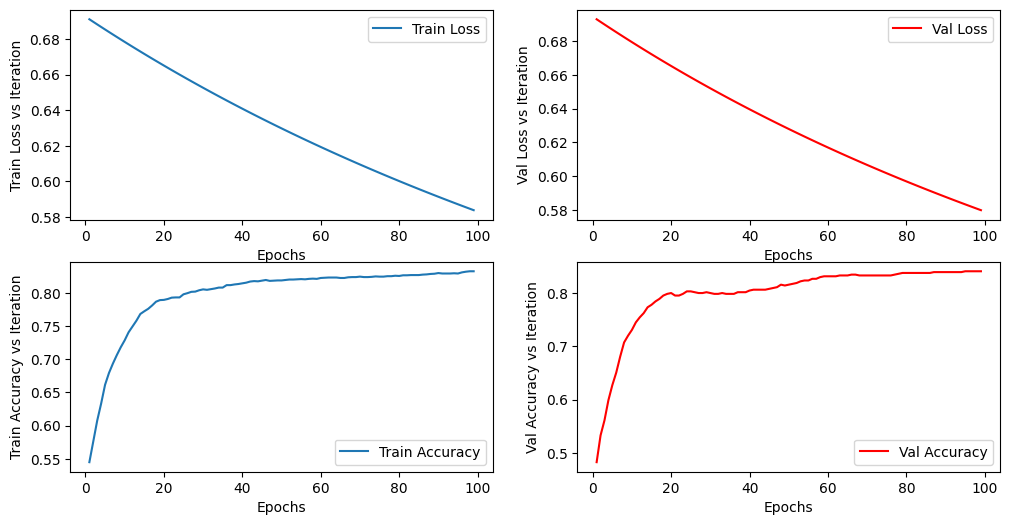

In [42]:
plt.figure(figsize=(12,6))

epochs = range(1,EPOCHS)

plt.subplot(2,2,1)
plt.plot(epochs, model.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



# COMBINATION OF BOTH

# plt.subplot(3,2,5)
# plt.plot(epochs, model.train_loss_list, label = 'Train Loss')
# plt.plot(epochs, model.val_loss_list, label = 'Val Loss', color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('Train Loss vs Val Loss')
# plt.legend()

# plt.subplot(3,2,6)
# plt.plot(epochs, model.train_acc, label = 'Train Accuracy')
# plt.plot(epochs, model.val_acc, label = 'Val Accuracy', color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('Train Accuracy vs Val Accuracy')
# plt.legend()

Metrics of dataset with no-scaling (standardization)

In [43]:
y_val_pred = model.predict(X_val_scaled)
# print(y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.sigmoid(np.dot(X_val_scaled, model.weights) + model.bias))

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
[[519  19]
 [ 82  16]]
Precision: 0.45714285714285713
Recall: 0.16326530612244897
F1 Score: 0.24060150375939846
ROC-AUC Score: 0.7182876868219407


Normalizing the dataset using the min_max_scaler (scratch implementation)

In [44]:
X_train_mm, X_test_mm, X_val_mm = min_max_scaler(X_train_scaled,X_test_scaled,X_val_scaled) 
X_train_mm.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2010,0.0,0.263158,0.000000,1.0,0.150000,0.0,0.0,1.0,0.0,0.283531,0.243499,0.456522,0.161173,0.263158,0.118550
3340,0.0,0.842105,0.000000,0.0,0.000000,1.0,0.0,1.0,0.0,0.302207,0.361702,0.423913,0.349733,0.210526,0.132768
3591,0.0,0.184211,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.166384,0.096927,0.282609,0.121425,0.242105,0.118550
2742,1.0,0.210526,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.205433,0.224586,0.347826,0.272176,0.200000,0.096045
4034,0.0,0.210526,0.333333,1.0,0.333333,0.0,0.0,0.0,0.0,0.179966,0.219858,0.347826,0.107610,0.536842,0.101695


# Part b

In [45]:
model_mm = MyLogisticRegression(lr = LR, epochs = EPOCHS)
model_mm.fit(X_train_mm, y_train, X_val_mm, y_val)

Epoch: 0, Train Loss: 0.6870, Train Accuracy: 0.8463, Val Loss: 0.6873, Val Accuracy: 0.8443
Epoch: 10, Train Loss: 0.6634, Train Accuracy: 0.8463, Val Loss: 0.6641, Val Accuracy: 0.8459
Epoch: 20, Train Loss: 0.6424, Train Accuracy: 0.8463, Val Loss: 0.6435, Val Accuracy: 0.8459
Epoch: 30, Train Loss: 0.6237, Train Accuracy: 0.8463, Val Loss: 0.6252, Val Accuracy: 0.8459
Epoch: 40, Train Loss: 0.6071, Train Accuracy: 0.8463, Val Loss: 0.6090, Val Accuracy: 0.8459
Epoch: 50, Train Loss: 0.5922, Train Accuracy: 0.8463, Val Loss: 0.5945, Val Accuracy: 0.8459
Epoch: 60, Train Loss: 0.5790, Train Accuracy: 0.8463, Val Loss: 0.5816, Val Accuracy: 0.8459
Epoch: 70, Train Loss: 0.5672, Train Accuracy: 0.8463, Val Loss: 0.5701, Val Accuracy: 0.8459
Epoch: 80, Train Loss: 0.5567, Train Accuracy: 0.8463, Val Loss: 0.5598, Val Accuracy: 0.8459
Epoch: 90, Train Loss: 0.5472, Train Accuracy: 0.8463, Val Loss: 0.5506, Val Accuracy: 0.8459


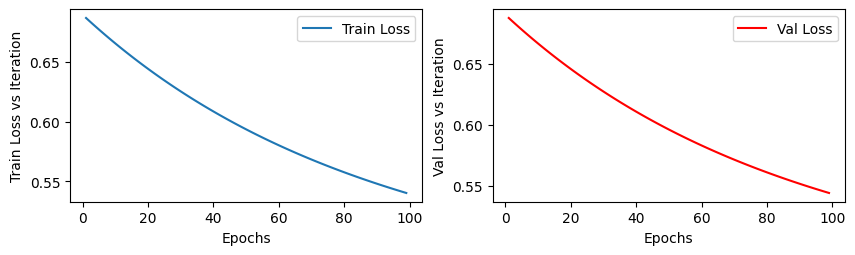

In [46]:
plt.figure(figsize=(10,2.5))

plt.subplot(1,2,1)
plt.plot(epochs, model_mm.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_mm.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

# Part c

Metrics of min-max scaled data

In [47]:
y_val_pred_mm = model_mm.predict(X_val_mm)
# print(y_val_pred_mm)

conf_matrix = confusion_matrix(y_val, y_val_pred_mm)
precision = precision_score(y_val, y_val_pred_mm)
recall = recall_score(y_val, y_val_pred_mm)
f1 = f1_score(y_val, y_val_pred_mm)
roc_auc = roc_auc_score(y_val, model_mm.sigmoid(np.dot(X_val_mm, model_mm.weights) + model_mm.bias))

# Print the results
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
[[538   0]
 [ 98   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.3146764281920947


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part d

Full Batch Gradient Descent

In [48]:
model_fgd = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=None)
model_fgd.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_fgd_test = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=None, pred_type = "test")
model_fgd_test.fit(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch: 0, Train Loss: 0.6906, Train Accuracy: 0.5772, Val Loss: 0.6914, Val Accuracy: 0.5456
Epoch: 10, Train Loss: 0.6766, Train Accuracy: 0.7431, Val Loss: 0.6765, Val Accuracy: 0.7704
Epoch: 20, Train Loss: 0.6635, Train Accuracy: 0.7805, Val Loss: 0.6626, Val Accuracy: 0.8113
Epoch: 30, Train Loss: 0.6511, Train Accuracy: 0.7970, Val Loss: 0.6495, Val Accuracy: 0.8223
Epoch: 40, Train Loss: 0.6394, Train Accuracy: 0.8119, Val Loss: 0.6372, Val Accuracy: 0.8286
Epoch: 50, Train Loss: 0.6284, Train Accuracy: 0.8193, Val Loss: 0.6257, Val Accuracy: 0.8333
Epoch: 60, Train Loss: 0.6181, Train Accuracy: 0.8227, Val Loss: 0.6148, Val Accuracy: 0.8333
Epoch: 70, Train Loss: 0.6083, Train Accuracy: 0.8247, Val Loss: 0.6046, Val Accuracy: 0.8333
Epoch: 80, Train Loss: 0.5990, Train Accuracy: 0.8301, Val Loss: 0.5950, Val Accuracy: 0.8349
Epoch: 90, Train Loss: 0.5903, Train Accuracy: 0.8355, Val Loss: 0.5859, Val Accuracy: 0.8412


Epoch: 0, Train Loss: 0.6905, Train Accuracy: 0.6045, Test 

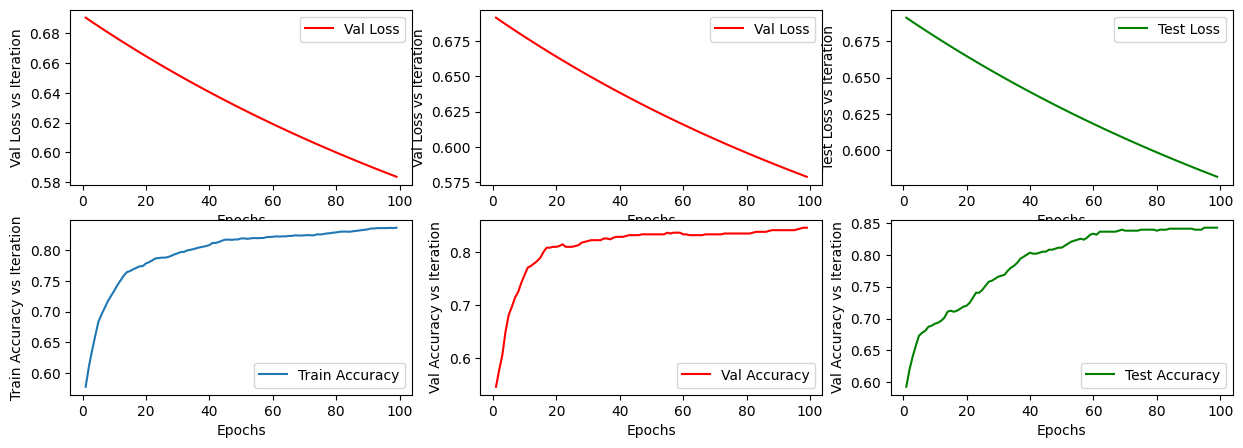

In [49]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_fgd.train_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()


plt.subplot(2,3,2)
plt.plot(epochs, model_fgd.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_fgd_test.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_fgd.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_fgd.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_fgd_test.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



Stochastic Gradient Descent

In [50]:
model_sgd = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=1)
model_sgd.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_sgd_test = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=1, pred_type = "test")
model_sgd_test.fit(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch: 0, Train Loss: 0.6915, Train Accuracy: 0.5482, Val Loss: 0.6918, Val Accuracy: 0.5377
Epoch: 10, Train Loss: 0.6872, Train Accuracy: 0.5492, Val Loss: 0.6915, Val Accuracy: 0.5157
Epoch: 20, Train Loss: 0.6731, Train Accuracy: 0.6864, Val Loss: 0.6733, Val Accuracy: 0.6981
Epoch: 30, Train Loss: 0.6649, Train Accuracy: 0.6942, Val Loss: 0.6690, Val Accuracy: 0.6588
Epoch: 40, Train Loss: 0.6468, Train Accuracy: 0.7886, Val Loss: 0.6464, Val Accuracy: 0.8097
Epoch: 50, Train Loss: 0.6327, Train Accuracy: 0.8270, Val Loss: 0.6300, Val Accuracy: 0.8302
Epoch: 60, Train Loss: 0.6230, Train Accuracy: 0.8007, Val Loss: 0.6170, Val Accuracy: 0.8145
Epoch: 70, Train Loss: 0.6098, Train Accuracy: 0.7879, Val Loss: 0.6035, Val Accuracy: 0.8035
Epoch: 80, Train Loss: 0.5977, Train Accuracy: 0.7883, Val Loss: 0.5906, Val Accuracy: 0.8003
Epoch: 90, Train Loss: 0.5862, Train Accuracy: 0.8163, Val Loss: 0.5800, Val Accuracy: 0.8208


Epoch: 0, Train Loss: 0.6923, Train Accuracy: 0.4845, Test 

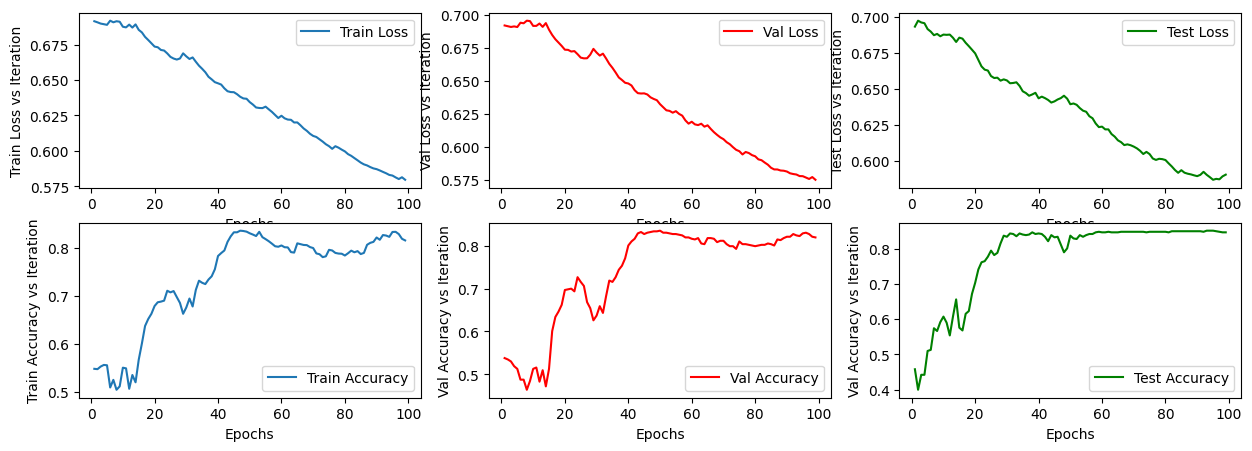

In [51]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_sgd.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs, model_sgd.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_sgd_test.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_sgd.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_sgd.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_sgd_test.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



Mini-Batch

In [52]:
print("----BATCH SIZE = 16----\n")

model_mb_16 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=16)
model_mb_16.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_mb_test_16 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=16, pred_type = "test")
model_mb_test_16.fit(X_train_scaled, y_train, X_test_scaled, y_test)


print("\n----BATCH SIZE = 4----\n")

model_mb_4 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=4)
model_mb_4.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

model_mb_test_4 = MyLogisticRegression(lr = LR, epochs = EPOCHS, batch_size=4, pred_type = "test")
model_mb_test_4.fit(X_train_scaled, y_train, X_test_scaled, y_test)

----BATCH SIZE = 16----

Epoch: 0, Train Loss: 0.6911, Train Accuracy: 0.5974, Val Loss: 0.6896, Val Accuracy: 0.6352
Epoch: 10, Train Loss: 0.6783, Train Accuracy: 0.7589, Val Loss: 0.6769, Val Accuracy: 0.7736
Epoch: 20, Train Loss: 0.6662, Train Accuracy: 0.8196, Val Loss: 0.6641, Val Accuracy: 0.8286
Epoch: 30, Train Loss: 0.6532, Train Accuracy: 0.8314, Val Loss: 0.6503, Val Accuracy: 0.8396
Epoch: 40, Train Loss: 0.6416, Train Accuracy: 0.8463, Val Loss: 0.6384, Val Accuracy: 0.8428
Epoch: 50, Train Loss: 0.6293, Train Accuracy: 0.8372, Val Loss: 0.6255, Val Accuracy: 0.8443
Epoch: 60, Train Loss: 0.6180, Train Accuracy: 0.8452, Val Loss: 0.6137, Val Accuracy: 0.8428
Epoch: 70, Train Loss: 0.6076, Train Accuracy: 0.8415, Val Loss: 0.6027, Val Accuracy: 0.8396
Epoch: 80, Train Loss: 0.5971, Train Accuracy: 0.8415, Val Loss: 0.5911, Val Accuracy: 0.8365
Epoch: 90, Train Loss: 0.5886, Train Accuracy: 0.8432, Val Loss: 0.5826, Val Accuracy: 0.8349


Epoch: 0, Train Loss: 0.6926, Trai

Batch Size 16 Plots


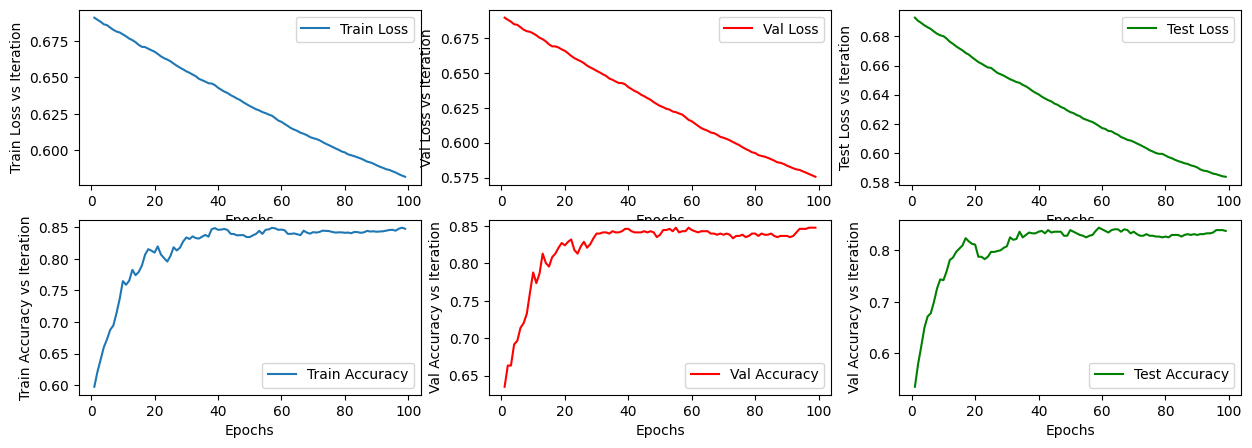

In [53]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_mb_16.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs, model_mb_16.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_mb_test_16.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_mb_16.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_mb_16.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_mb_test_16.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



Batch Size 4 Plots


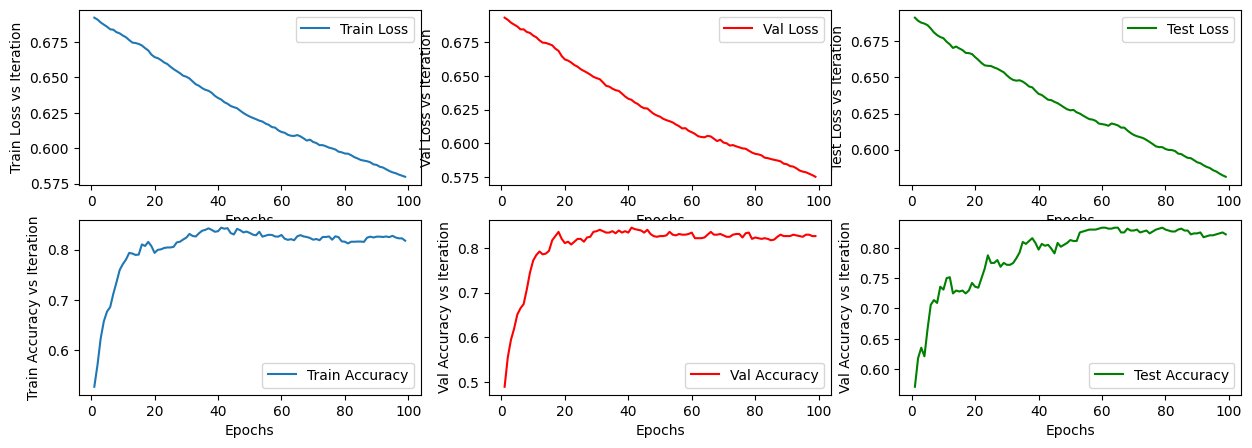

In [54]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.plot(epochs, model_mb_4.train_loss_list, label = 'Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs, model_mb_4.val_loss_list, label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, model_mb_test_4.val_loss_list, label = 'Test Loss', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs, model_mb_4.train_acc, label = 'Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs, model_mb_4.val_acc, label = 'Val Accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs, model_mb_test_4.val_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()



# Part e

In [55]:
#Function to apply k fold 
def k_fold_cross_validation_scratch(X_train, y_train, X_val, y_val, k=5):
    X = np.concatenate((X_train, X_val))
    y = np.concatenate((y_train, y_val))

    # Shuffling the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]

    # Spliting the data into k folds
    fold_size = len(X) // k
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for fold in range(k):
        # Validation dold
        start_val_idx = fold * fold_size
        end_val_idx = start_val_idx + fold_size if fold != k - 1 else len(X)

        X_val_fold = X[start_val_idx:end_val_idx]
        y_val_fold = y[start_val_idx:end_val_idx]

        # Generating training fold (all data except the validation fold)
        X_train_fold = np.concatenate((X[:start_val_idx], X[end_val_idx:]))
        y_train_fold = np.concatenate((y[:start_val_idx], y[end_val_idx:]))

        # Training
        model = MyLogisticRegression(lr=LR, epochs=EPOCHS, batch_size=None)
        model.fit(X_train_fold, y_train_fold, X_val_fold, y_val_fold)

        y_pred = model.predict(X_val_fold)

        # Calculate metrics
        accuracies.append(accuracy_score(y_val_fold, y_pred))
        precisions.append(precision_score(y_val_fold, y_pred))
        recalls.append(recall_score(y_val_fold, y_pred))
        f1_scores.append(f1_score(y_val_fold, y_pred))

        print(f"\n----Fold {fold + 1} completed----\n")

    return accuracies, precisions, recalls, f1_scores

In [56]:
# Cross-validation
accuracies, precisions, recalls, f1_scores = k_fold_cross_validation_scratch(X_train_scaled, y_train, X_val_scaled, y_val)

metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
}

for metric_name, metric_values in metrics.items():
    avg = np.mean(metric_values)
    std = np.std(metric_values)
    print(f"{metric_name}: Avg = {avg:.4f}, Std = {std:.4f}")

# Train final model on all training and validation data
X_train_val = np.concatenate((X_train_scaled, X_val_scaled))
y_train_val = np.concatenate((y_train, y_val))

final_model = MyLogisticRegression(lr=LR, epochs=EPOCHS, batch_size=None, pred_type="test")
final_model.fit(X_train_val, y_train_val, X_test_scaled, y_test)

# Evaluate on test set
y_pred_test = final_model.predict(X_test_scaled)
print("\nFinal Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test):.4f}")


Epoch: 0, Train Loss: 0.6900, Train Accuracy: 0.5527, Val Loss: 0.6895, Val Accuracy: 0.5625
Epoch: 10, Train Loss: 0.6759, Train Accuracy: 0.7280, Val Loss: 0.6753, Val Accuracy: 0.7514
Epoch: 20, Train Loss: 0.6627, Train Accuracy: 0.7755, Val Loss: 0.6620, Val Accuracy: 0.7931
Epoch: 30, Train Loss: 0.6502, Train Accuracy: 0.7918, Val Loss: 0.6495, Val Accuracy: 0.7972
Epoch: 40, Train Loss: 0.6386, Train Accuracy: 0.8033, Val Loss: 0.6377, Val Accuracy: 0.8042
Epoch: 50, Train Loss: 0.6276, Train Accuracy: 0.8071, Val Loss: 0.6266, Val Accuracy: 0.8111
Epoch: 60, Train Loss: 0.6173, Train Accuracy: 0.8123, Val Loss: 0.6161, Val Accuracy: 0.8181
Epoch: 70, Train Loss: 0.6075, Train Accuracy: 0.8171, Val Loss: 0.6063, Val Accuracy: 0.8167
Epoch: 80, Train Loss: 0.5983, Train Accuracy: 0.8175, Val Loss: 0.5969, Val Accuracy: 0.8222
Epoch: 90, Train Loss: 0.5896, Train Accuracy: 0.8199, Val Loss: 0.5881, Val Accuracy: 0.8250

----Fold 1 completed----

Epoch: 0, Train Loss: 0.6944, Trai

# Part f

In [57]:
#Use 0.5 or more Learning Rate here if the model keeps improving on 0.1 and early stopping isn't deploying
# FGD and Batch Size = 16 have similar performance and one model beats the other depending upon the split hence, I have decided to continue with FGD

early_stopping_model =  MyLogisticRegression(lr = 0.5, epochs = EPOCHS, batch_size=None, early_stopping=True)
early_stopping_model.fit(X_train_scaled, y_train, X_val_scaled, y_val)

print("\n")

early_stopping_model_test= MyLogisticRegression(lr = 0.5, epochs = EPOCHS, batch_size=None, pred_type = "test", early_stopping=True)
early_stopping_model_test.fit(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch: 0, Train Loss: 0.6260, Train Accuracy: 0.8125, Val Loss: 0.6223, Val Accuracy: 0.8223
Epoch: 10, Train Loss: 0.4246, Train Accuracy: 0.8533, Val Loss: 0.4196, Val Accuracy: 0.8459
Epoch: 20, Train Loss: 0.3949, Train Accuracy: 0.8517, Val Loss: 0.3926, Val Accuracy: 0.8522
Epoch: 30, Train Loss: 0.3869, Train Accuracy: 0.8510, Val Loss: 0.3862, Val Accuracy: 0.8538
Epoch: 40, Train Loss: 0.3840, Train Accuracy: 0.8517, Val Loss: 0.3845, Val Accuracy: 0.8538
Epoch: 50, Train Loss: 0.3828, Train Accuracy: 0.8523, Val Loss: 0.3842, Val Accuracy: 0.8538
Early stopping at epoch 57


Epoch: 0, Train Loss: 0.6260, Train Accuracy: 0.8223, Test Loss: 0.6243, Test Accuracy: 0.8381
Epoch: 10, Train Loss: 0.4243, Train Accuracy: 0.8530, Test Loss: 0.4141, Test Accuracy: 0.8632
Epoch: 20, Train Loss: 0.3948, Train Accuracy: 0.8523, Test Loss: 0.3809, Test Accuracy: 0.8648
Epoch: 30, Train Loss: 0.3868, Train Accuracy: 0.8510, Test Loss: 0.3711, Test Accuracy: 0.8648
Epoch: 40, Train Loss: 0.

Graphs without early stopping are above, and with early stopping are below

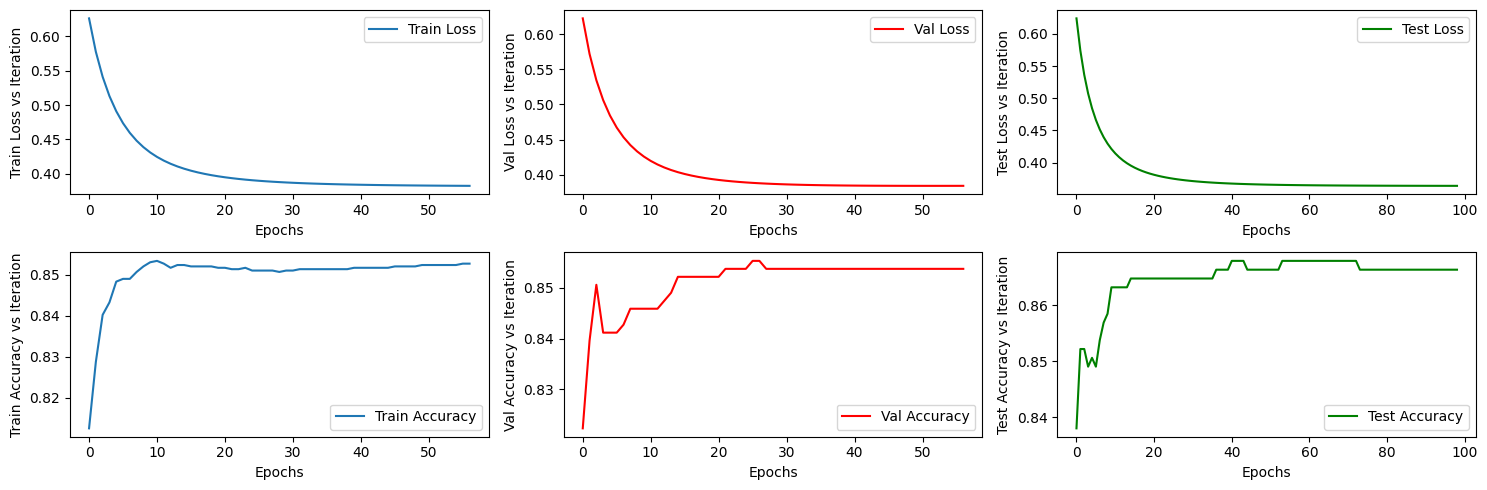

In [58]:
import numpy as np

plt.figure(figsize=(15,5))

# Create x-values corresponding to the number of epochs
epochs_range = np.arange(len(early_stopping_model.train_loss_list))

plt.subplot(2,3,1)
plt.plot(epochs_range, early_stopping_model.train_loss_list, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Train Loss vs Iteration')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs_range, early_stopping_model.val_loss_list, label='Val Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Val Loss vs Iteration')
plt.legend()

# For the test model, the length of the val_loss_list may differ, so use the appropriate range
epochs_range_test = np.arange(len(early_stopping_model_test.val_loss_list))
plt.subplot(2,3,3)
plt.plot(epochs_range_test, early_stopping_model_test.val_loss_list, label='Test Loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss vs Iteration')
plt.legend()

plt.subplot(2,3,4)
plt.plot(epochs_range, early_stopping_model.train_acc, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs_range, early_stopping_model.val_acc, label='Val Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy vs Iteration')
plt.legend()

plt.subplot(2,3,6)
plt.plot(epochs_range_test, early_stopping_model_test.val_acc, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy vs Iteration')
plt.legend()

plt.tight_layout()
plt.show()

